<a href="https://colab.research.google.com/github/DamiTheCraftyPythonista/Thesis/blob/main/Hate_crimes_CZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
data = pd.read_excel("_verbální nenávistné TČ.xlsx")

In [5]:
data.head()

,rok,§ 352,Unnamed: 2,Unnamed: 3,§ 355 (§ 198),Unnamed: 5,Unnamed: 6,§ 356 (§198a),Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,§ 405 (§ 261a),Unnamed: 14,Unnamed: 15,celkem,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,Stíháno,Obž.,Ods.,Stíháno,Obž.,Ods.,Stíháno,Obž.,Ods.,...,Obž.,Ods.,Stíháno,Obž.,Ods.,Stíháno,Obž.,Ods.,% Obž.,% Ods.
1,1989.0,0,0,NaN,44,25,NaN,0,0,NaN,...,34,NaN,0,0,NaN,83,59,NaN,71.084337,NaN
2,1990.0,0,0,NaN,14,1,NaN,0,0,NaN,...,2,NaN,0,0,NaN,21,3,NaN,14.285714,NaN
3,1991.0,0,0,NaN,6,4,NaN,0,0,NaN,...,1,NaN,0,0,NaN,10,5,NaN,50,NaN
4,1992.0,0,0,NaN,1,1,NaN,1,0,NaN,...,12,NaN,0,0,NaN,18,13,NaN,72.222222,NaN


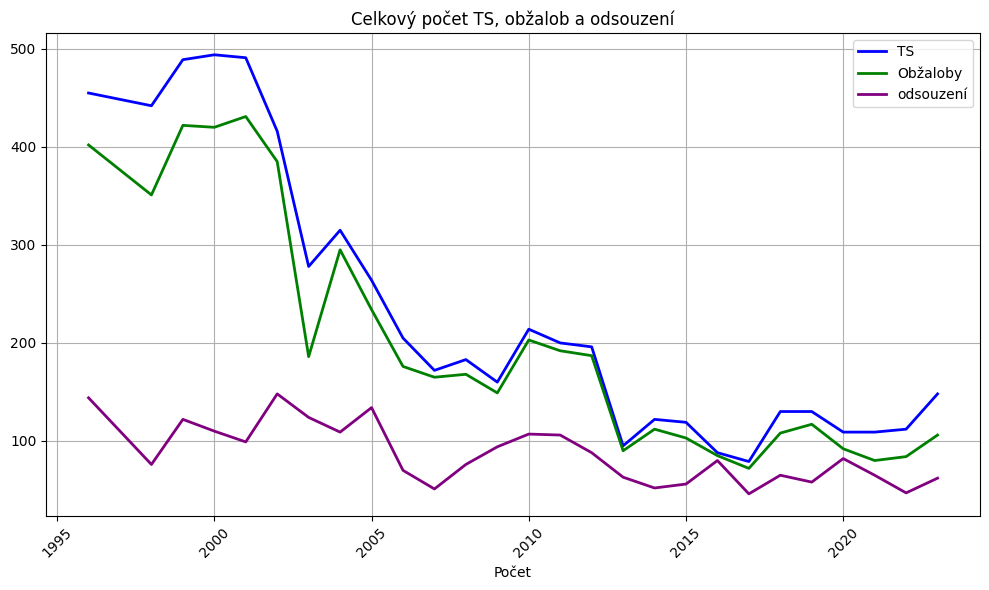

In [27]:
import matplotlib.pyplot as plt

data_ods = data[['rok ', 'celkem ', 'Unnamed: 17', 'Unnamed: 18']].dropna()

data_ods.columns = ['rok', 'TS', 'Obž.', 'Ods.']
data_ods[['rok', 'TS', 'Obž.', 'Ods.']] = data_ods[['rok', 'TS', 'Obž.', 'Ods.']].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
plt.plot(data_ods['rok'], data_ods['TS'], label='TS', color='blue', linewidth=2)
plt.plot(data_ods['rok'], data_ods['Obž.'], label='Obžaloby', color='green', linewidth=2)
plt.plot(data_ods['rok'], data_ods['Ods.'], label='odsouzení', color='purple', linewidth=2)


plt.title('Celkový počet TS, obžalob a odsouzení')
plt.xlabel('Počet')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [38]:
data_obž_ods = data[['rok ', 'Unnamed: 17', 'Unnamed: 18']].dropna()

data_obž_ods.columns = ['rok', 'Obž.', 'Ods.']

data_obž_ods['%obž_ods'] = (data_obž_ods['Ods.'] / data_obž_ods['Obž.']) * 100
data_obž_ods['%obž_ods'] = data_obž_ods['%obž_ods'].round(0)
data_obž_ods['%obž_ods_MA3'] = data_obž_ods['%obž_ods'].rolling(window=3).mean()

data_obž_ods.head()

,rok,Obž.,Ods.,%obž_ods,%obž_ods_MA3
8,1996.0,402,144,35.820896,NaN
10,1998.0,351,76,21.652422,NaN
11,1999.0,422,122,28.909953,28.794423
12,2000.0,420,110,26.190476,25.584283
13,2001.0,431,99,22.969838,26.023422


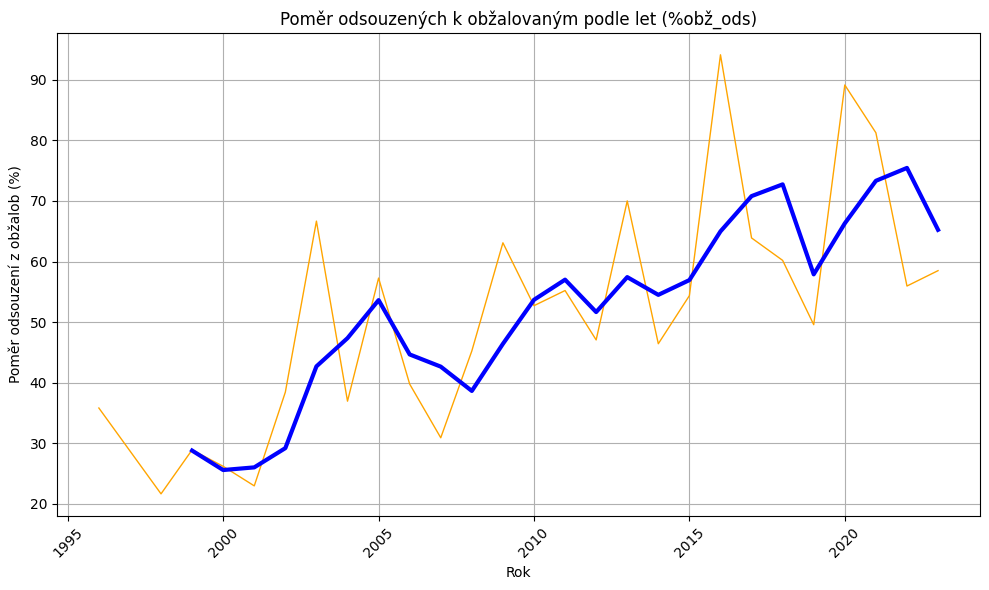

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(data_obž_ods['rok'], data_obž_ods['%obž_ods'], color='orange', linewidth=1)
plt.plot(data_obž_ods['rok'], data_obž_ods['%obž_ods_MA3'], color='blue', linewidth=3, label='MA3')

plt.title('Poměr odsouzených k obžalovaným podle let (%obž_ods)')
plt.xlabel('Rok')
plt.ylabel('Poměr odsouzení z obžalob (%)')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

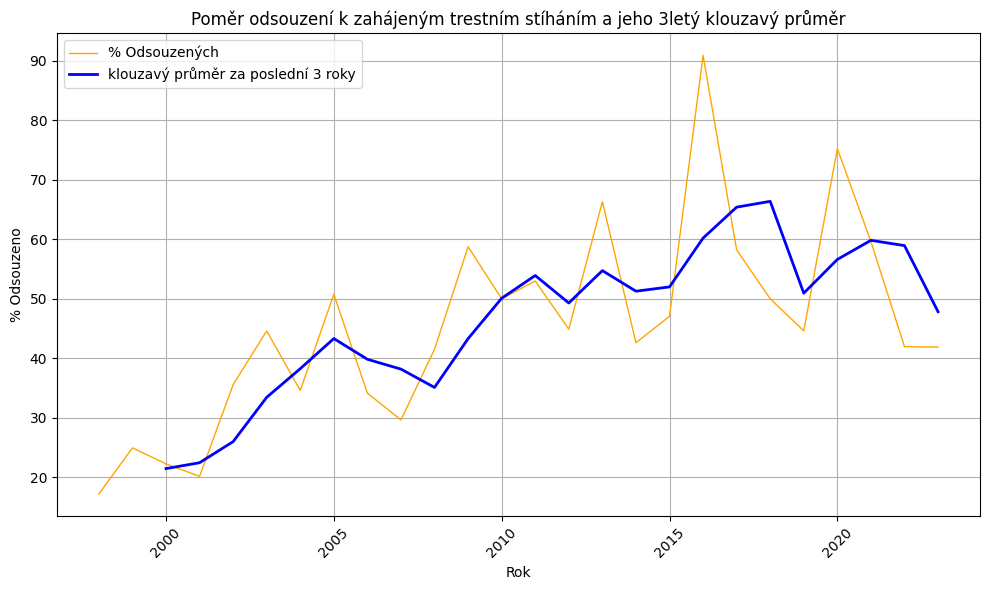

In [44]:
data_ods = data[['rok ', 'Unnamed: 20']].dropna()
data_ods.columns = ['rok', '% Ods.']

data_ods['% Ods.'] = pd.to_numeric(data_ods['% Ods.'], errors='coerce')
data_ods = data_ods[data_ods['rok'] >= 1998]

data_ods['% Ods. (3-rolling)'] = data_ods['% Ods.'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))
plt.plot(data_ods['rok'], data_ods['% Ods.'], label='% Odsouzených', color='orange', linewidth=1)
plt.plot(data_ods['rok'], data_ods['% Ods. (3-rolling)'], label='klouzavý průměr za poslední 3 roky', color='blue', linewidth=2)

plt.title('Poměr odsouzení k zahájeným trestním stíháním a jeho 3letý klouzavý průměr')
plt.xlabel('Rok')
plt.ylabel('% Odsouzeno')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [7]:
data_ods['% Ods.']

,% Ods.
10,17.194570
11,24.948875
12,22.267206
13,20.162933
14,35.576923
15,44.604317
16,34.603175
17,50.757576
18,34.146341
19,29.651163


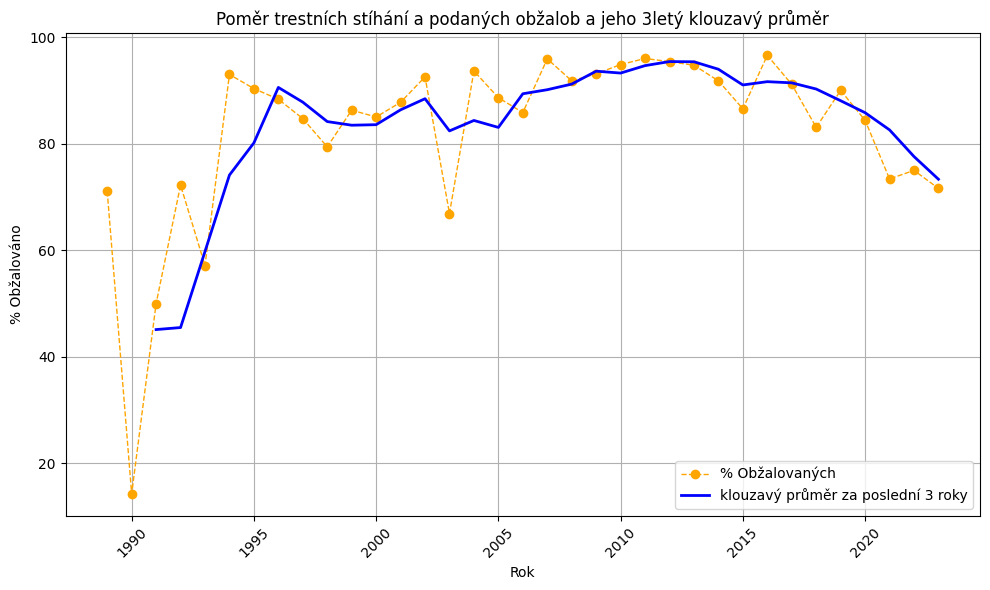

In [46]:
data_obž = data[['rok ', 'Unnamed: 19']].dropna()
data_obž.columns = ['rok', '% Obž.']

data_obž['% Obž.'] = pd.to_numeric(data_obž['% Obž.'], errors='coerce')

data_obž['% Obž. (3-rolling)'] = data_obž['% Obž.'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))
plt.plot(data_obž['rok'], data_obž['% Obž.'], label='% Obžalovaných', marker='o', linestyle='--', color='orange', linewidth=1)
plt.plot(data_obž['rok'], data_obž['% Obž. (3-rolling)'], label='klouzavý průměr za poslední 3 roky', color='blue', linewidth=2)

plt.title('Poměr trestních stíhání a podaných obžalob a jeho 3letý klouzavý průměr')
plt.xlabel('Rok')
plt.ylabel('% Obžalováno')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [29]:
data_obž.head()

,rok,% Obž.,% Obž. (3-rolling)
1,1989.0,71.084337,NaN
2,1990.0,14.285714,NaN
3,1991.0,50.000000,45.123351
4,1992.0,72.222222,45.502646
5,1993.0,57.142857,59.788360


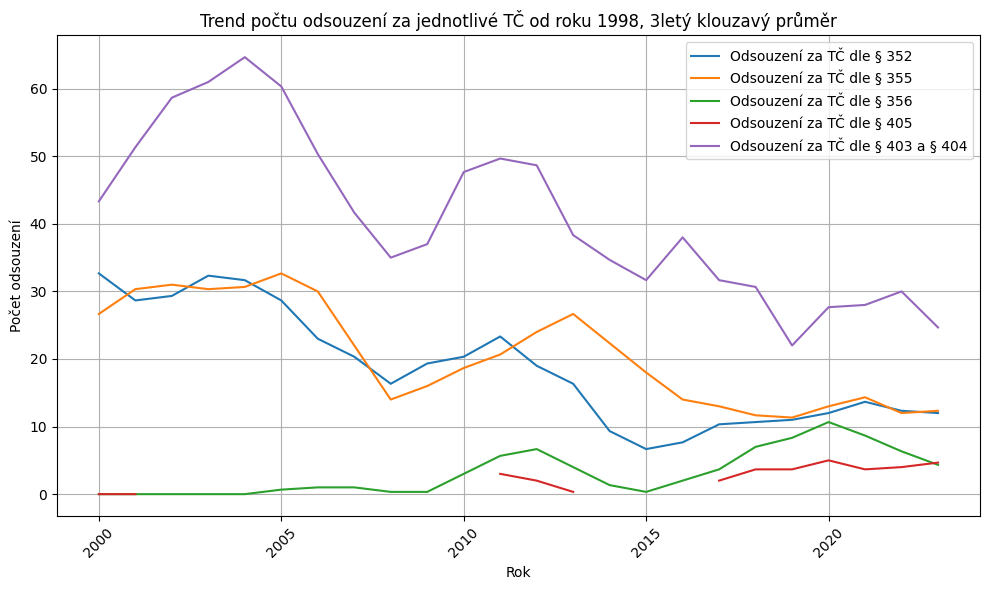

In [9]:
data_filtered = data[data['rok '] >= 1998]

offense_columns = {
    '§ 352': 'Unnamed: 3',
    '§ 355': 'Unnamed: 6',
    '§ 356': 'Unnamed: 9',
    '§ 405': 'Unnamed: 15',
    '§ 403 a § 404' : 'Unnamed: 12'
}

plt.figure(figsize=(10, 6))

for offense, column in offense_columns.items():
    rolling_avg = data_filtered[column].rolling(window=3).mean()
    plt.plot(data_filtered['rok '], rolling_avg, label=f'Odsouzení za TČ dle {offense}')

    # plt.plot(data_filtered['rok '], data_filtered[column], label=f'Odsouzení za TČ dle {offense}')

plt.title('Trend počtu odsouzení za jednotlivé TČ od roku 1998, 3letý klouzavý průměr')
plt.xlabel('Rok')
plt.ylabel('Počet odsouzení')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [10]:
data_filtered = data[data['rok '] >= 1998]

df_352 = pd.DataFrame({
    'rok': data_filtered['rok '],
    'Stíháno': data_filtered['§ 352'],
    'Obž.': data_filtered['Unnamed: 2'],
    'Ods.': data_filtered['Unnamed: 3'],
})

df_352.reset_index(drop=True, inplace=True)

df_352['%Obž.'] = (df_352['Obž.'] / df_352['Stíháno'] * 100).fillna(0).round(0).astype(int)
df_352['%Ods.'] = (df_352['Ods.'] / df_352['Stíháno'] * 100).fillna(0).round(0).astype(int)

df_352.head()

<ipython-input-10-ccd47fada253>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_352['%Obž.'] = (df_352['Obž.'] / df_352['Stíháno'] * 100).fillna(0).round(0).astype(int)
<ipython-input-10-ccd47fada253>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_352['%Ods.'] = (df_352['Ods.'] / df_352['Stíháno'] * 100).fillna(0).round(0).astype(int)


,rok,Stíháno,Obž.,Ods.,%Obž.,%Ods.
0,1998.0,129,111,36,86,28
1,1999.0,163,147,33,90,20
2,2000.0,122,108,29,89,24
3,2001.0,95,92,24,97,25
4,2002.0,88,84,35,95,40


In [11]:
df_355 = pd.DataFrame({
    'rok': data_filtered['rok '],
    'Stíháno': data_filtered['§ 355 (§ 198)'],
    'Obž.': data_filtered['Unnamed: 5'],
    'Ods.': data_filtered['Unnamed: 6'],
})

df_355.reset_index(drop=True, inplace=True)

df_355['%Obž.'] = (df_355['Obž.'] / df_355['Stíháno'] * 100).fillna(0).round(0).astype(int)
df_355['%Ods.'] = (df_355['Ods.'] / df_355['Stíháno'] * 100).fillna(0).round(0).astype(int)

df_355.head()

<ipython-input-11-36e240d3384b>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_355['%Obž.'] = (df_355['Obž.'] / df_355['Stíháno'] * 100).fillna(0).round(0).astype(int)
<ipython-input-11-36e240d3384b>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_355['%Ods.'] = (df_355['Ods.'] / df_355['Stíháno'] * 100).fillna(0).round(0).astype(int)


,rok,Stíháno,Obž.,Ods.,%Obž.,%Ods.
0,1998.0,124,90,25,73,20
1,1999.0,103,91,31,88,30
2,2000.0,150,129,24,86,16
3,2001.0,127,118,36,93,28
4,2002.0,105,98,33,93,31


In [12]:
df_356 = pd.DataFrame({
    'rok': data_filtered['rok '],
    'Stíháno': data_filtered['§ 356 (§198a)'],
    'Obž.': data_filtered['Unnamed: 8'],
    'Ods.': data_filtered['Unnamed: 9'],
})

df_356.reset_index(drop=True, inplace=True)

df_356['%Obž.'] = (df_356['Obž.'] / df_356['Stíháno'] * 100).fillna(0).round(0).astype(int)
df_356['%Ods.'] = (df_356['Ods.'] / df_356['Stíháno'] * 100).fillna(0).round(0).astype(int)

df_356.head()

<ipython-input-12-87d1f99b0853>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_356['%Obž.'] = (df_356['Obž.'] / df_356['Stíháno'] * 100).fillna(0).round(0).astype(int)
<ipython-input-12-87d1f99b0853>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_356['%Ods.'] = (df_356['Ods.'] / df_356['Stíháno'] * 100).fillna(0).round(0).astype(int)


,rok,Stíháno,Obž.,Ods.,%Obž.,%Ods.
0,1998.0,7,6,0,86,0
1,1999.0,12,11,0,92,0
2,2000.0,19,14,0,74,0
3,2001.0,19,16,0,84,0
4,2002.0,4,3,0,75,0


In [13]:
df_403_404 = pd.DataFrame({
    'rok': data_filtered['rok '],
    'Stíháno': data_filtered['§ 403 a § 404 (§ 260 a 261)'],
    'Obž.': data_filtered['Unnamed: 11'],
    'Ods.': data_filtered['Unnamed: 12'],
})

df_403_404.reset_index(drop=True, inplace=True)

df_403_404['%Obž.'] = (df_403_404['Obž.'] / df_403_404['Stíháno'] * 100).fillna(0).round(0).astype(int)
df_403_404['%Ods.'] = (df_403_404['Ods.'] / df_403_404['Stíháno'] * 100).fillna(0).round(0).astype(int)


df_403_404.head()

<ipython-input-13-5b7c4ab19343>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_403_404['%Obž.'] = (df_403_404['Obž.'] / df_403_404['Stíháno'] * 100).fillna(0).round(0).astype(int)
<ipython-input-13-5b7c4ab19343>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_403_404['%Ods.'] = (df_403_404['Ods.'] / df_403_404['Stíháno'] * 100).fillna(0).round(0).astype(int)


,rok,Stíháno,Obž.,Ods.,%Obž.,%Ods.
0,1998.0,182,144,15,79,8
1,1999.0,211,173,58,82,27
2,2000.0,203,169,57,83,28
3,2001.0,249,205,39,82,16
4,2002.0,218,199,80,91,37


In [14]:
import numpy as np

df_405 = pd.DataFrame({
    'rok': data_filtered['rok '],
    'Stíháno': data_filtered['§ 405 (§ 261a)'],
    'Obž.': data_filtered['Unnamed: 14'],
    'Ods.': data_filtered['Unnamed: 15'],
})

df_405.reset_index(drop=True, inplace=True)

# df_405['%Obž.'] = (df_405['Obž.'] / df_405['Stíháno'] * 100).fillna(0).round(0).astype(int)
# df_405['%Ods.'] = (df_405['Ods.'] / df_405['Stíháno'] * 100).fillna(0).round(0).astype(int)

df_405.head()

,rok,Stíháno,Obž.,Ods.
0,1998.0,0,0,0
1,1999.0,0,0,0
2,2000.0,0,0,0
3,2001.0,1,0,0
4,2002.0,1,1,NaN


In [15]:
data_filtered.head()

,rok,§ 352,Unnamed: 2,Unnamed: 3,§ 355 (§ 198),Unnamed: 5,Unnamed: 6,§ 356 (§198a),Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,§ 405 (§ 261a),Unnamed: 14,Unnamed: 15,celkem,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
10,1998.0,129,111,36,124,90,25,7,6,0,...,144,15,0,0,0,442,351,76,79.411765,17.19457
11,1999.0,163,147,33,103,91,31,12,11,0,...,173,58,0,0,0,489,422,122,86.298569,24.948875
12,2000.0,122,108,29,150,129,24,19,14,0,...,169,57,0,0,0,494,420,110,85.020243,22.267206
13,2001.0,95,92,24,127,118,36,19,16,0,...,205,39,1,0,0,491,431,99,87.780041,20.162933
14,2002.0,88,84,35,105,98,33,4,3,0,...,199,80,1,1,NaN,416,385,148,92.548077,35.576923


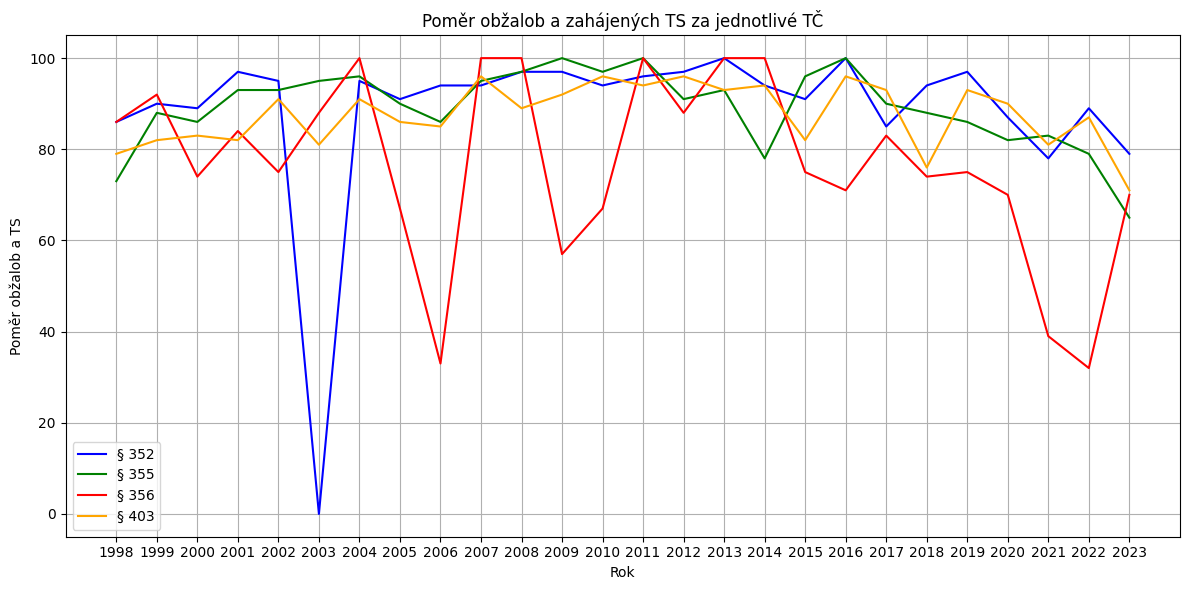

In [16]:
plt.figure(figsize=(12, 6))

colors = {
    '§ 352': 'blue',
    '§ 355': 'green',
    '§ 356': 'red',
    '§ 403': 'orange',
}

plt.plot(df_352['rok'], df_352['%Obž.'], color=colors['§ 352'], linestyle='-', label='§ 352')
plt.plot(df_355['rok'], df_355['%Obž.'], color=colors['§ 355'], linestyle='-', label='§ 355')
plt.plot(df_356['rok'], df_356['%Obž.'], color=colors['§ 356'], linestyle='-', label='§ 356')
plt.plot(df_403_404['rok'], df_403_404['%Obž.'], color=colors['§ 403'], linestyle='-', label='§ 403')

plt.title('Poměr obžalob a zahájených TS za jednotlivé TČ')
plt.xlabel('Rok')
plt.ylabel('Poměr obžalob a TS')
plt.xticks(df_352['rok'])
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

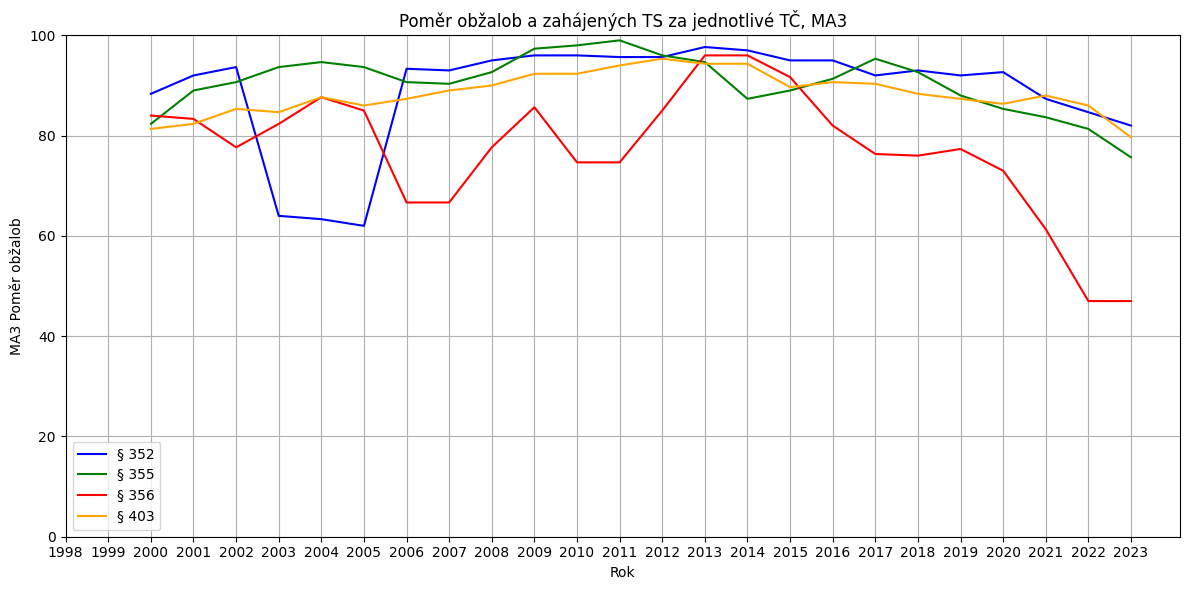

In [17]:
df_352['MA3_%Obž.'] = df_352['%Obž.'].rolling(window=3).mean()
df_355['MA3_%Obž.'] = df_355['%Obž.'].rolling(window=3).mean()
df_356['MA3_%Obž.'] = df_356['%Obž.'].rolling(window=3).mean()
df_403_404['MA3_%Obž.'] = df_403_404['%Obž.'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))

colors = {
    '§ 352': 'blue',
    '§ 355': 'green',
    '§ 356': 'red',
    '§ 403': 'orange',
}

plt.plot(df_352['rok'], df_352['MA3_%Obž.'], color=colors['§ 352'], linestyle='-', label='§ 352')
plt.plot(df_355['rok'], df_355['MA3_%Obž.'], color=colors['§ 355'], linestyle='-', label='§ 355')
plt.plot(df_356['rok'], df_356['MA3_%Obž.'], color=colors['§ 356'], linestyle='-', label='§ 356')
plt.plot(df_403_404['rok'], df_403_404['MA3_%Obž.'], color=colors['§ 403'], linestyle='-', label='§ 403')

plt.title('Poměr obžalob a zahájených TS za jednotlivé TČ, MA3')
plt.xlabel('Rok')
plt.ylabel('MA3 Poměr obžalob')
plt.xticks(df_352['rok'])
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

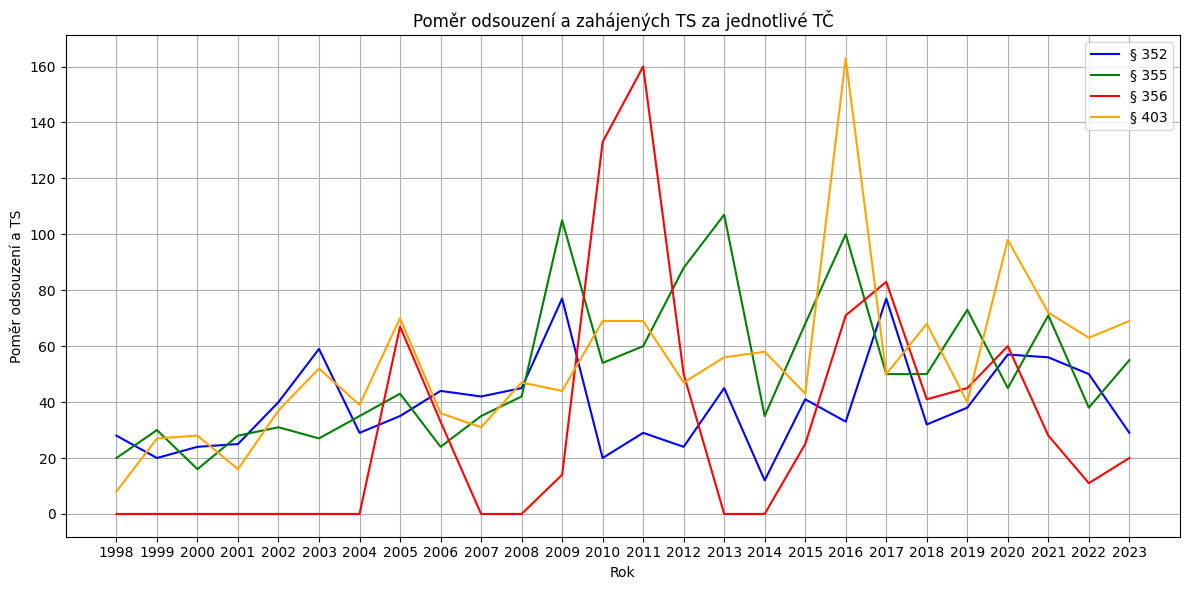

In [18]:
plt.figure(figsize=(12, 6))

colors = {
    '§ 352': 'blue',
    '§ 355': 'green',
    '§ 356': 'red',
    '§ 403': 'orange',
}

plt.plot(df_352['rok'], df_352['%Ods.'], color=colors['§ 352'], linestyle='-', label='§ 352')
plt.plot(df_355['rok'], df_355['%Ods.'], color=colors['§ 355'], linestyle='-', label='§ 355')
plt.plot(df_356['rok'], df_356['%Ods.'], color=colors['§ 356'], linestyle='-', label='§ 356')
plt.plot(df_403_404['rok'], df_403_404['%Ods.'], color=colors['§ 403'], linestyle='-', label='§ 403')

plt.title('Poměr odsouzení a zahájených TS za jednotlivé TČ')
plt.xlabel('Rok')
plt.ylabel('Poměr odsouzení a TS')
plt.xticks(df_352['rok'])
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

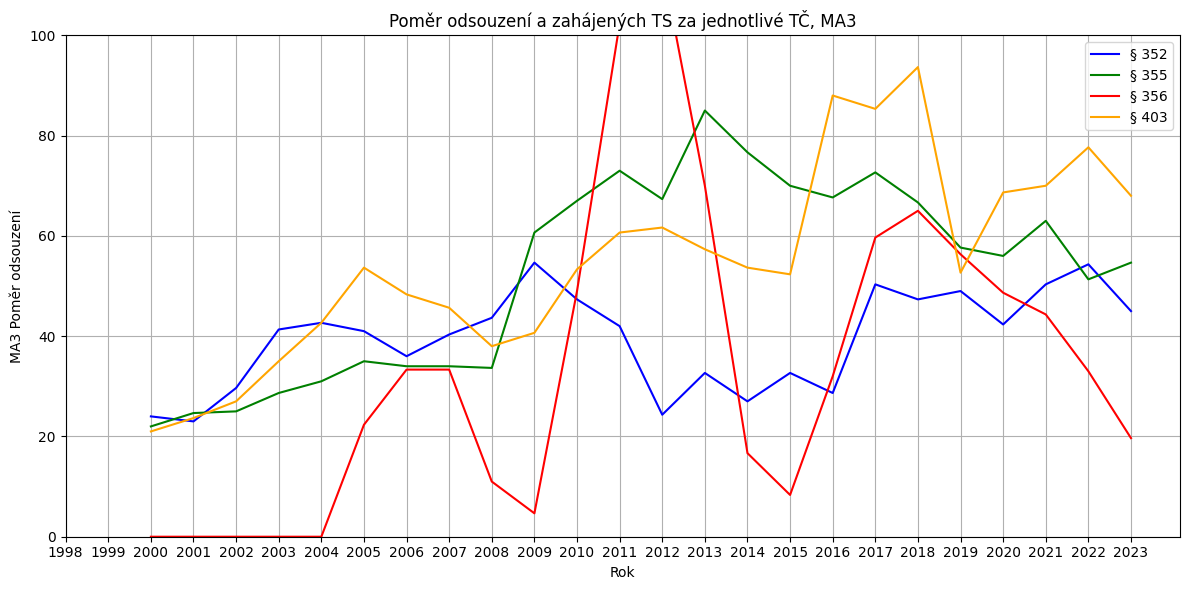

In [19]:
df_352['MA3_%Ods.'] = df_352['%Ods.'].rolling(window=3).mean()
df_355['MA3_%Ods.'] = df_355['%Ods.'].rolling(window=3).mean()
df_356['MA3_%Ods.'] = df_356['%Ods.'].rolling(window=3).mean()
df_403_404['MA3_%Ods.'] = df_403_404['%Ods.'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))

colors = {
    '§ 352': 'blue',
    '§ 355': 'green',
    '§ 356': 'red',
    '§ 403': 'orange',
}

plt.plot(df_352['rok'], df_352['MA3_%Ods.'], color=colors['§ 352'], linestyle='-', label='§ 352')
plt.plot(df_355['rok'], df_355['MA3_%Ods.'], color=colors['§ 355'], linestyle='-', label='§ 355')
plt.plot(df_356['rok'], df_356['MA3_%Ods.'], color=colors['§ 356'], linestyle='-', label='§ 356')
plt.plot(df_403_404['rok'], df_403_404['MA3_%Ods.'], color=colors['§ 403'], linestyle='-', label='§ 403')

plt.title('Poměr odsouzení a zahájených TS za jednotlivé TČ, MA3')
plt.xlabel('Rok')
plt.ylabel('MA3 Poměr odsouzení')
plt.xticks(df_352['rok'])
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()